# 実践コンピュータビジョン

[実践 コンピュータビジョン](https://www.oreilly.co.jp/books/9784873116075/)  
[Multiple View Geometry in Computer Vision](https://www.amazon.co.jp/dp/0521540518)(以下、MVGCVと呼ぶ) 

演習ノート

# 4. カメラモデルと拡張現実

## 4.1 ピンホールカメラモデル
### カメラ座標系→画像座標系
3次元上の座標から、画像中の2次元座標への変換を考える。

<img src="figures/40pinhole_camera.png" width="600">

ズーム倍率を指定すれば、多くのカメラはピンホールカメラとしてモデル化できる。ピンホールカメラでは穴の位置から造影素子の距離を焦点距離$f$とする。そしてここでは焦点距離の単位はmなどで表せ、物理的な長さを表している。

#### 透視投影変換
ピンホールカメラの穴の位置を原点とし、カメラを構えて右を$X$軸、下を$Y$軸、前方向を$Z$軸正方向とした、右手座標系を考える。後のために$Y$軸を下向きにしている。

3次元上の座標$P:(x,y,z)$をどのように画像中の座標に変換するかを考える。

まず、下の図のように、$Y,Z$平面で考え、$P:(x,y,z)$を$Z=1$の平面上の点、$P':(x',y',1)$に移すと考える。

<img src="figures/41pinhole_camera_proportion.png" width="600">

このとき三角形の相似の関係から$P':(x',y',1)$は次のように計算できる。
$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}=
\begin{pmatrix}
\frac{x}{z} \\
\frac{y}{z} \\
1
\end{pmatrix}
$$

そして点$P':(x',y')の次元(長さや時間といった物理的な次元)を考えると、距離を距離で割っているので、次元は無次元と考えられる。

#### ビューポート変換
そしてこの$Z=1$上の点$P':(x',y')$を画像に切り出したときのピクセル座標$P'':(u,v)$への対応関係を考える。理想的なカメラの場合、下の図のように、$Z=1$の平面を$f$倍し、さらに画像左上が原点になるように座標変換することで変換できる。このような変換をビューポート変換と呼ぶ

<img src="figures/42viewport_trans.png" width="800">

ピクセル座標$P'':(u,v)$は次のように表せる。
$$
\begin{pmatrix}
u \\
v 
\end{pmatrix}
=\begin{pmatrix}
f x' +c_x\\
f y' +c_y
\end{pmatrix}
$$
$P':(x',y')$は無次元で、変換後のピクセル座標の単位はピクセルなので、ここでの焦点距離$f$の単位はピクセルである。最初のピンホールカメラの図で示した焦点距離とは単位が異なることに注意。

同次座標を用いて行列で表せば、次のようになる。
$$
\begin{pmatrix}
u \\
v \\
1
\end{pmatrix}
=\begin{pmatrix}
f & 0 & c_x\\
0 & f & c_y\\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
$$

さらに、$(x',y')=(x/z,y/z)$を代入し、全体に$z$を掛ければ、次のようになる。
$$
\lambda
\begin{pmatrix}
u \\
v \\
1
\end{pmatrix}
=\begin{pmatrix}
f & 0 & c_x\\
0 & f & c_y\\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
$$
このように、最初の3次元上の座標から、画像上の2次元ピクセル座標の同次座標が1つの行列計算で求められる。
ここで$\lambda=z$であるが、同次座標はその定義から定数倍しても同じ座標を表すので、左についている$\lambda$は気にしなくてもいい。

### ワールド座標系→カメラ座標系

上で3次元座標はカメラを原点とするカメラ座標系で表せられていた。実際はカメラの位置は任意なので、固定されたワールド座標系系からカメラ座標系への変換を考えたい。  

3次元上での回転行列を$R$、カメラ原点からワールド原点へのベクトルを$(t_x,t_y,t_z)$とすると、ワールド座標系の点$(x_w,y_w,z_w)$は次のようにカメラ座標系$(x_c,y_c,z_z)$へ変換できる。

$$
\begin{pmatrix}
x_c \\
y_c \\
z_c
\end{pmatrix}
=R\begin{pmatrix}
x_w \\
y_w \\
z_w
\end{pmatrix}
+\begin{pmatrix}
t_x \\
t_y \\
t_z
\end{pmatrix}=
\left(R|t\right)\begin{pmatrix}
x_w \\
y_w \\
z_w \\
1
\end{pmatrix}
$$

よって、ワールド座標系→カメラ座標系→画像座標系の変換を合わせれば、ワールド座標系→画像座標系への変換は次のようになる
$$
\lambda
\begin{pmatrix}
u \\
v \\
1
\end{pmatrix}=
K\left(R|t\right)
\begin{pmatrix}
x_w \\
y_w \\
z_w \\
1
\end{pmatrix}
$$

$K$をキャリブレーション行列、$P=K\left(R|t\right)$をカメラ行列と呼ぶ

詳しくは以下参照

https://qiita.com/iwatake2222/items/c3fe0139d37c4e01c07b  

## 4.1.2 3Dの射影
3D上の点を画像上への射影行列を利用して、画像へ射影し、図示する

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from scipy import linalg

import sys
sys.path.append("../")
from impro import impro,camera

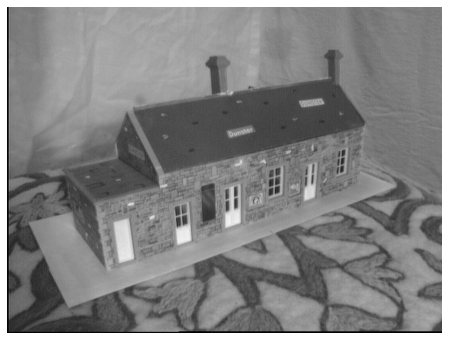

In [191]:
# 対象となる家の模型の画像を表示
im_path=Path("resources/oxford_muliti/house/image/house.000.pgm")
im=cv2.imread(str(im_path))
impro.imshow(im)

In [195]:
# house.p3dを読み込み、転置する
house_path=Path("resources/oxford_muliti/house/3D/house.p3d")
points_house=np.loadtxt(house_path).T
# 3x672で、3次元上の座標の集まり
points_house

array([[-1.4889  , -1.13932 ,  1.09404 , ..., -2.49859 , -2.51002 ,
        -1.59536 ],
       [ 1.09408 ,  0.935522,  0.738447, ..., -0.117172, -0.144305,
        -1.37243 ],
       [-5.89588 , -5.62824 , -4.53106 , ..., -6.76897 , -6.7266  ,
        -3.78376 ]])

In [196]:
# 4x672の同次座標に変換する
point_hmg=np.vstack(
    [
        points_house,
        np.ones(points_house.shape[1])
    ]
)
point_hmg

array([[-1.4889  , -1.13932 ,  1.09404 , ..., -2.49859 , -2.51002 ,
        -1.59536 ],
       [ 1.09408 ,  0.935522,  0.738447, ..., -0.117172, -0.144305,
        -1.37243 ],
       [-5.89588 , -5.62824 , -4.53106 , ..., -6.76897 , -6.7266  ,
        -3.78376 ],
       [ 1.      ,  1.      ,  1.      , ...,  1.      ,  1.      ,
         1.      ]])

In [197]:
# 3次元上の座標から、画像中への射影行列を定義する
# この行列はカメラの焦点距離が1ピクセル、元の座標で(0,0,10)の位置に
# z軸正方向に向いたカメラがあるとしている
P = np.hstack([
    np.eye(3),
    np.array([[0],[0],[-10]])
])
P

array([[  1.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   1., -10.]])

In [13]:
# 射影Pからカメラオブジェクトを生成する
cam=camera.Camera(P)

In [198]:
# 3次元上の座標を画像座標系へ射影する
x=cam.project(point_hmg)
x

array([[-0.36278179, -0.260609  ,  0.20004608, ..., -0.77331068,
        -0.76679294, -0.25664389],
       [ 0.2665809 ,  0.21399208,  0.13502562, ..., -0.0362646 ,
        -0.04408413, -0.22078137],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

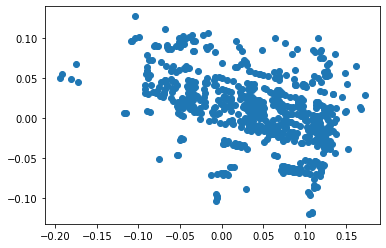

In [15]:
# 図示する
# これが仮想的なカメラに映った画像と言える
plt.scatter(x[0,:],x[1,:])

### カメラの移動
ベクトル$r(x,y,z)$回りの回転行列は次の指数関数行列で表せる。
$$
R=\exp{\begin{pmatrix}
0 & -z & y \\
z & 0 & -x \\
-y & x & 0
\end{pmatrix}
}
$$

詳しくは
[CV・CG・ロボティクスのためのリー群・リー代数入門: (0) 目次 - swk's log はてな別館](https://swkagami.hatenablog.com/entry/lie_00toc)の5章まで読めばわかると思われる。  

これは自作モジュールの`camera.rotation_matrix`に実装済み

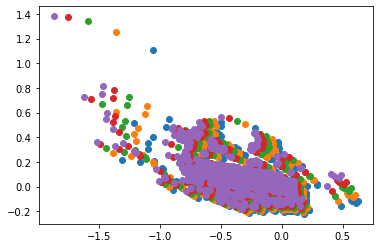

In [31]:
# カメラを少しずつ回転させる
cam=camera.Camera(P)
np.random.seed(0)
r = 0.05*np.random.rand(3)
rot = camera.rotation_matrix(r)
for t in range(5):
    cam.P = cam.P @ rot
    x = cam.project(point_hmg)
    plt.scatter(x[0,:],x[1,:])
plt.show()

### 4.1.3 カメラ行列の分解
カメラ行列$P=K\left(R|t\right)$が与えられたとき、それを$K$、$R$、$t$に分解したい。  
#### RQ分解
まず$t$以外の部分、すなわち$P$の左側の正方行列部分$P_{3*3}$は
$$
P_{3*3}=KR
$$
である。また、$K$は上三角行列、$R$は直交行列である。  

ここで任意の正方行列$A$は次のように上三角行列$R'$と直交行列$Q'$に分解できる
$$
A=R'Q'
$$
これをカメラ行列に当てはめれば、$R'=K$、$Q'=R$である。詳しくは[QR分解 - Wikipedia](https://ja.wikipedia.org/wiki/QR%E5%88%86%E8%A7%A3)参照

この時、RQ分解で求められた、$K'$が次のようであったとする。
$$
K'=\begin{pmatrix}
f_x' & s' & c_x'\\
0 & f_y' & c_y'\\
0 & 0 & w
\end{pmatrix}
$$
焦点距離は必ず正であるが、焦点距離$f_x'$、$f_y'$は正とは限らない。そこで$T$を次のように定義する。
$$
T=\begin{pmatrix}
sgn(f_x') & 0 & 0\\
0 & sgn(f_y') & 0\\
0 & 0 & sgn(w)
\end{pmatrix}
$$
そして$K'$と$T$の積$K=K'T$は次のようになる。
$$
K=\begin{pmatrix}
sgn(f_x')f_x' & sgn(f_y')s' & sgn(w)c_x'\\
0 & sgn(f_y')f_y' & sgn(w)c_y'\\
0 & 0 & sgn(w)w
\end{pmatrix}
$$
この$K$の焦点距離はどちらも正となる。

#### 教科書での実装は間違いでは?
上のように単純に$K=K'T$とすれば焦点距離は正になるはずなのに、なぜか
```python
if np.linalg.det(T) < 0:
    T[1,1] *= -1
```
という分岐処理が実装されている。

#### tの導出
$P$の右側部分$P_t$は
$$
P_t=K\boldsymbol{t}
$$
なので、両辺左から$K^{-1}$を掛ければ$t$が求まる
$$
\boldsymbol{t}=K^{-1}P_t
$$

In [2]:
# 教科書通りの実装
mtx_k=np.array([
    [1000,0,500],
    [0,1000,300],
    [0,0,1]
])
mtx_tmp=camera.rotation_matrix([0,0,1])[:3,:3]
mtx_rt=np.hstack([mtx_tmp,np.array([[50],[40],[30]])])
cam=camera.Camera(mtx_k @ mtx_rt)

print("---- 元のキャリブレーション行列、回転行列 ----")
print(mtx_k)
print(mtx_rt)
mtx_k_rstr,mtx_r_rstr,t_rstr=cam.factor_solem()
print("---- 教科書の実装で復元されたK、回転行列 ----")
print(mtx_k_rstr)
print(mtx_r_rstr)
# 焦点距離がマイナスになってしまっている

---- 元のキャリブレーション行列、回転行列 ----
[[1000    0  500]
 [   0 1000  300]
 [   0    0    1]]
[[ 0.54030231 -0.84147098  0.         50.        ]
 [ 0.84147098  0.54030231  0.         40.        ]
 [ 0.          0.          1.         30.        ]]
---- 教科書の実装で復元されたK、回転行列 ----
[[ 1000.     0.   500.]
 [    0. -1000.   300.]
 [    0.     0.     1.]]
[[ 0.54030231 -0.84147098  0.        ]
 [-0.84147098 -0.54030231  0.        ]
 [ 0.          0.          1.        ]]


In [4]:
# 不要な分岐処理をコメントアウトした場合
print("---- 元のキャリブレーション行列、回転行列 ----")
print(mtx_k)
print(mtx_rt)
mtx_k_rstr,mtx_r_rstr,t_rstr=cam.factor()
print("---- 復元されたK、回転行列 ----")
print(mtx_k_rstr)
print(mtx_r_rstr)
# 焦点距離きちんと正になっている

---- 元のキャリブレーション行列、回転行列 ----
[[1000    0  500]
 [   0 1000  300]
 [   0    0    1]]
[[ 0.54030231 -0.84147098  0.         50.        ]
 [ 0.84147098  0.54030231  0.         40.        ]
 [ 0.          0.          1.         30.        ]]
---- 復元されたK、回転行列 ----
[[1000.    0.  500.]
 [   0. 1000.  300.]
 [   0.    0.    1.]]
[[ 0.54030231 -0.84147098  0.        ]
 [ 0.84147098  0.54030231  0.        ]
 [ 0.          0.          1.        ]]


### 4.1.4 カメラ中心の計算

ワールド座標系のカメラ中心を$C(p_{c1},p_{c2},p_{c3})$とすると、ワールド座標系からカメラ座標系に移したときに原点になるはずなので、次のようになる
$$
\left(R|t\right)
\begin{pmatrix}
p_{c1} \\
p_{c2} \\
p_{c3} \\
1
\end{pmatrix}=
\begin{pmatrix}
0 \\
0 \\
0
\end{pmatrix}
$$
これは次のように変換できる。
$$
\boldsymbol{C}=-R^T\boldsymbol{t}
$$
よって$R$と$\boldsymbol{t}$が分かれば、カメラ中心の座標が分かる。これは自作モジュールの`camera.Camera.center`に実装済み

In [17]:
# 3次元上の座標から、画像中への射影行列を定義する
# この行列はカメラの焦点距離が1ピクセル、元の座標で(0,0,10)の位置に
# z軸正方向に向いたカメラがあるとしている
P = np.hstack([
    np.eye(3),
    np.array([[0],[0],[10]])
])
cam=camera.Camera(P)
cam.center()
# 上の予想通りの座標になった

array([  0.,   0., -10.])

## 4.2 カメラキャリブレーション